<a href="https://colab.research.google.com/github/NijjohUnno/Sales-Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import the python Libraries and the dataset**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

January = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_January_2019.csv')
February = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_February_2019.csv')
March = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_March_2019.csv')
April = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_April_2019.csv')
May = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_March_2019.csv')
June = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_June_2019.csv')
July = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_July_2019.csv')
August = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_August_2019.csv')
September = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_September_2019.csv')
October = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_October_2019.csv')
November = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_November_2019.csv')
December = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_December_2019.csv')

In [ ]:
January.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


**Merging the 12 months sales Data into a single file.**

In [4]:
sales_year = pd.concat([January, February, March,April, May, June, July, August, September, October, November, December])



**Read updated DataFrame.**

In [ ]:
sales_year.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


**Check the new data frame**

In [ ]:
sales_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185441 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          184907 non-null  object
 1   Product           184907 non-null  object
 2   Quantity Ordered  184907 non-null  object
 3   Price Each        184907 non-null  object
 4   Order Date        184907 non-null  object
 5   Purchase Address  184907 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**Summary Statistics**

**Checking Sum of null values for each column**

In [ ]:
print(sales_year.isnull().sum())

Order ID            534
Product             534
Quantity Ordered    534
Price Each          534
Order Date          534
Purchase Address    534
dtype: int64


**Checking rows of Nan**

In [ ]:
nan_rows = sales_year[sales_year.isna().any(axis=1)]
print(nan_rows)

      Order ID Product Quantity Ordered Price Each Order Date Purchase Address
664        NaN     NaN              NaN        NaN        NaN              NaN
678        NaN     NaN              NaN        NaN        NaN              NaN
797        NaN     NaN              NaN        NaN        NaN              NaN
876        NaN     NaN              NaN        NaN        NaN              NaN
1299       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
22945      NaN     NaN              NaN        NaN        NaN              NaN
22962      NaN     NaN              NaN        NaN        NaN              NaN
23309      NaN     NaN              NaN        NaN        NaN              NaN
23996      NaN     NaN              NaN        NaN        NaN              NaN
24730      NaN     NaN              NaN        NaN        NaN              NaN

[534 rows x 6 columns]


**Dropping rows of Nan**

In [ ]:
sales_year = sales_year.dropna()
nan_rows = sales_year[sales_year.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address]
Index: []


**Add Month Column**

In [ ]:
# Extracting the month component and adding it as a new column
s = pd.Series('Order Date')
sales_year['Month'] = sales_year['Order Date'].str.slice(stop=2)
sales_year.tail()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12
25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001",12


**What was the best month for sales? How much was earned that month**

In [ ]:
# Converting 'Quantity Ordered' and 'Price Each' to numeric values and handling errors
sales_year['Quantity Ordered'] = pd.to_numeric(sales_year['Quantity Ordered'], errors='coerce')
sales_year['Price Each'] = pd.to_numeric(sales_year['Price Each'], errors='coerce')

# Droping rows with NaN values resulting from non-numeric conversions
sales_year = sales_year.dropna(subset=['Quantity Ordered', 'Price Each'])

# Calculating total sales for each order
sales_year['Total Sales'] = sales_year['Quantity Ordered'] * sales_year['Price Each']

# Group by month and calculating the total sales for each month
monthly_sales = sales_year.groupby('Month')['Total Sales'].sum()

# Finding the best month for sales and the corresponding earnings
best_month = monthly_sales.idxmax()
earnings_in_best_month = monthly_sales.max()

print(f"The best month for sales was Month {best_month} with earnings of {earnings_in_best_month:,.2f}")


The best month for sales was Month 03 with earnings of 5,610,993.26


**Monthly Sales**

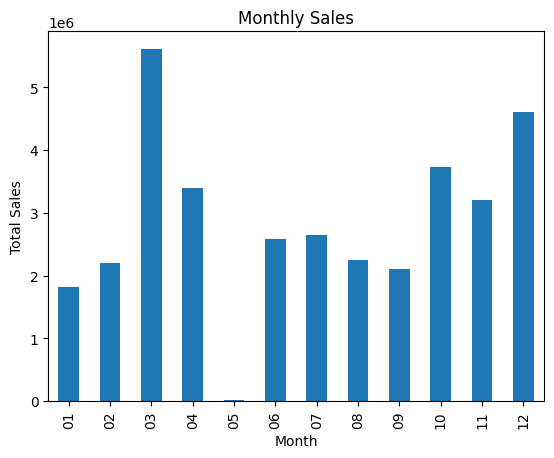

In [ ]:
monthly_sales = sales_year.groupby('Month')['Total Sales'].sum()

monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**Product Performance Analysis**

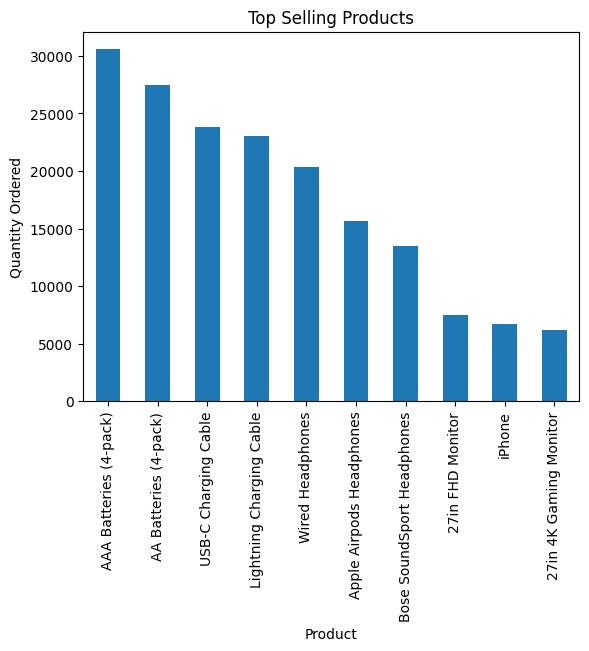

In [ ]:
# Top-selling products
top_products = sales_year.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)

# Bar chart for top-selling products
top_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()


**What city sold the most product?**

In [8]:
# Converting 'Purchase Address' to string type
sales_year['Purchase Address'] = sales_year['Purchase Address'].astype(str)

# Extracting city from the postal address
sales_year['City'] = sales_year['Purchase Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else None)

# Display the updated DataFrame with the new 'City' column
print(sales_year.head())


  Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address           City  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215         Boston  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035       Portland  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  San Francisco  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001    Los Angeles  
4  01/25/19 11:59          387 10th St, Austin, TX 73301         Austin  


In [10]:
# Convert 'Quantity Ordered' to numeric
sales_year['Quantity Ordered'] = pd.to_numeric(sales_year['Quantity Ordered'], errors='coerce')

# Group by city and calculate the total quantity of products sold in each city
city_sales = sales_year.groupby('City')['Quantity Ordered'].sum()

# Find the city with the most products sold
most_sold_city = city_sales.idxmax()
quantity_sold_in_most_sold_city = city_sales.max()

print(f"The city that sold the most products was {most_sold_city} with a total of {quantity_sold_in_most_sold_city} products sold.")


The city that sold the most products was San Francisco with a total of 49822.0 products sold.


**Top 10 Cities**

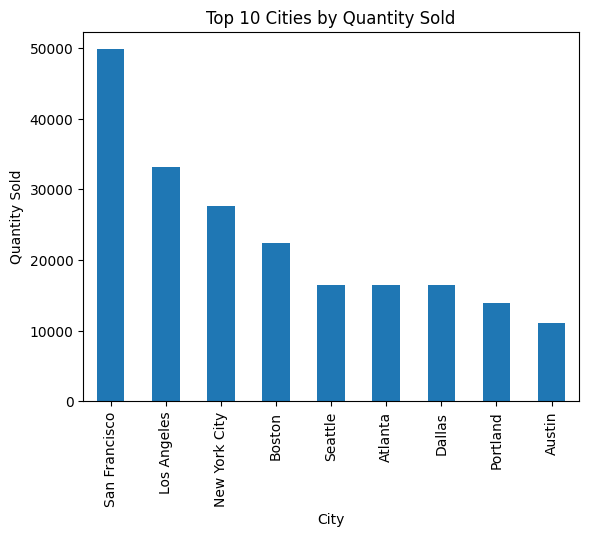

In [11]:
# Group by city and calculate the total quantity of products sold in each city
city_sales = sales_year.groupby('City')['Quantity Ordered'].sum()

# Sorting the cities based on quantity sold and selecting the top 10
top_cities = city_sales.sort_values(ascending=False).head(10)

top_cities.plot(kind='bar')
plt.title('Top 10 Cities by Quantity Sold')
plt.xlabel('City')
plt.ylabel('Quantity Sold')
plt.show()

**What time should we display advertisemens to maximize the likelihood of customer’s buying product?**

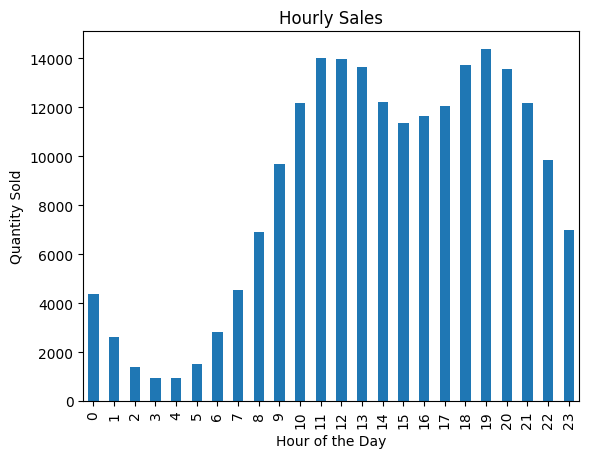

In [14]:
# Convert 'Order Date' to datetime format with errors='coerce'
sales_year['Order Date'] = pd.to_datetime(sales_year['Order Date'], errors='coerce')

# Drop rows with NaT values resulting from invalid date-time conversions
sales_year = sales_year.dropna(subset=['Order Date'])

# Extract the hour from the 'Order Date' and create a new column 'Order Hour'
sales_year.loc[:, 'Order Hour'] = sales_year['Order Date'].dt.hour

# Group by hour and calculate the total quantity of products sold in each hour
hourly_sales = sales_year.groupby('Order Hour')['Quantity Ordered'].sum()

hourly_sales.plot(kind='bar')
plt.title('Hourly Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Quantity Sold')
plt.show()



It appears that the peak hours for customer purchases are during 10 AM to 12 PM and 6 PM to 8 PM. These time periods consistently exhibit higher sales, suggesting that customers are more likely to make purchases during these hours. Therefore, we recommend focusing and optimizing your advertisement displays during these peak hours to maximize the likelihood of customer engagement and product purchases.

**What products are most often sold together?**

In [15]:
# Identifying rows with the same 'Order ID' and creating a new column 'Grouped Products'
sales_year['Grouped Products'] = sales_year.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

# Droping duplicate rows to keep unique order groups
unique_order_groups = sales_year[['Order ID', 'Grouped Products']].drop_duplicates()

# Counting the frequency of each unique group of products
from itertools import combinations
from collections import Counter

count = Counter()

for row in unique_order_groups['Grouped Products']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))

# Display the most common product combinations
for key, value in count.most_common(10):
    print(f"Products: {', '.join(key)}, Count: {value}")


Products: USB-C Charging Cable, USB-C Charging Cable, Count: 1828
Products: Lightning Charging Cable, Lightning Charging Cable, Count: 1819
Products: AA Batteries (4-pack), AA Batteries (4-pack), Count: 1717
Products: AAA Batteries (4-pack), AAA Batteries (4-pack), Count: 1694
Products: Wired Headphones, Wired Headphones, Count: 1547
Products: Apple Airpods Headphones, Apple Airpods Headphones, Count: 1351
Products: Bose SoundSport Headphones, Bose SoundSport Headphones, Count: 1217
Products: iPhone, Lightning Charging Cable, Count: 1070
Products: Google Phone, USB-C Charging Cable, Count: 1066
Products: 27in FHD Monitor, 27in FHD Monitor, Count: 619


**What product sold the most? Why do you think it sold the most?**

In [16]:
# Group by product and calculate the total quantity of each product sold
product_sales = sales_year.groupby('Product')['Quantity Ordered'].sum()

# Find the product that sold the most
best_selling_product = product_sales.idxmax()
quantity_sold_of_best_selling_product = product_sales.max()

print(f"The product that sold the most was '{best_selling_product}' with a total quantity sold of {quantity_sold_of_best_selling_product} units.")


The product that sold the most was 'AAA Batteries (4-pack)' with a total quantity sold of 30564.0 units.
